<a href="https://colab.research.google.com/github/Nandish30115/Aerofit_Data_Analysis/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: appload a file from device

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving aerofit.csv to aerofit.csv
User uploaded file "aerofit.csv" with length 7279 bytes


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('aerofit.csv')
raw_data.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## The Above Output shows the Data Type of each of the columns of the dataset and the no. of rows in the data set given.

In [ ]:
unimputed_data=raw_data

## ***Now Let Us find the Number of columns with NaN/Null Values.***

In [ ]:
columns_with_nan = unimputed_data.columns[unimputed_data.isna().any()].tolist() #Gives the columns with NaN or null
columns_with_nan

[]

# ***There are No columns with Null. Which means Data Imputation iss not Necessary. So the Data Is Cleaned.***

In [ ]:
clean_data=raw_data

# **Now let us Find the outliers for every continuous variable in the dataset**

In [ ]:
clean_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


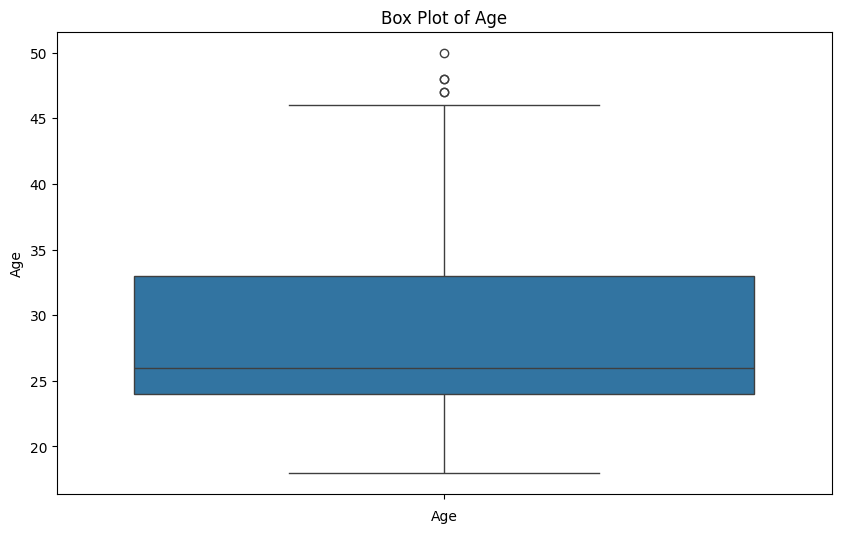

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_data, y='Age')
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

### It can be seenthat there are 3 outliers in the age column of the dataset

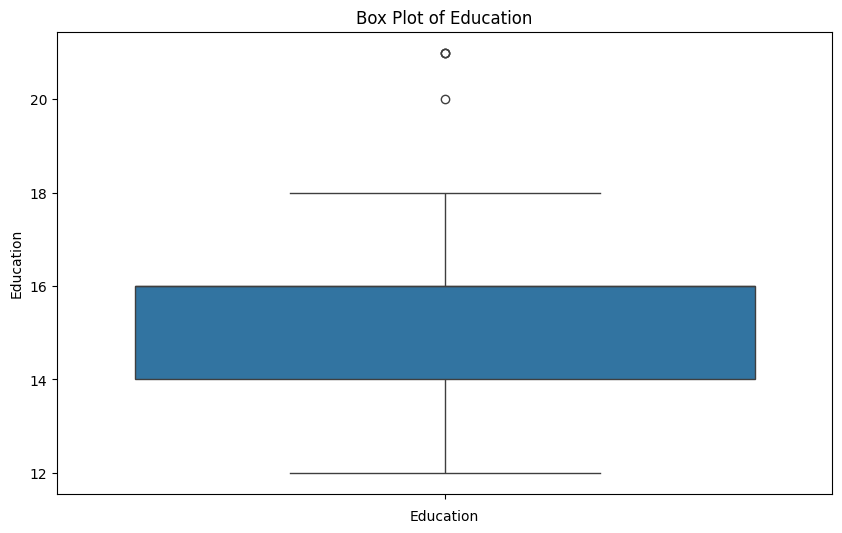

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_data, y='Education')
plt.xlabel('Education')
plt.title('Box Plot of Education')
plt.show()

## There are 2 Outliers in the  Education Column as well

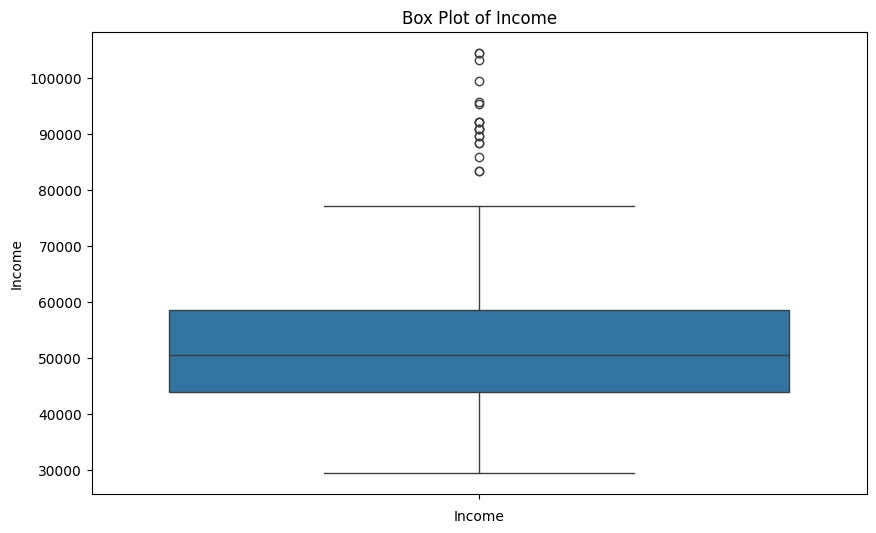

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_data, y='Income')
plt.xlabel('Income')
plt.title('Box Plot of Income')
plt.show()

## There are Quite a few Outliers in the Icome column as well.

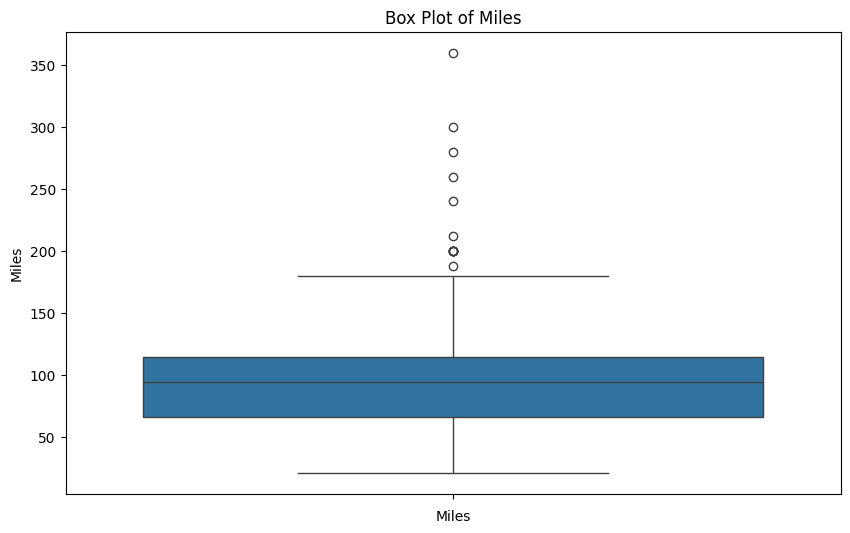

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_data, y='Miles')
plt.xlabel('Miles')
plt.title('Box Plot of Miles')
plt.show()

## There are 8 Outliers in the Miles column of the dataset as well.

## **Now let us clip the data between the 5 percentile and 95 percentile**

In [ ]:
def clip_data(data, column):
    lower_bound = data[column].quantile(0.05)
    upper_bound = data[column].quantile(0.95)
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [ ]:
clip_age=clip_data(clean_data,'Age')
clip_age

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
...,...,...,...,...,...,...,...,...,...
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200


In [ ]:
clip_education=clip_data(clip_age,'Education')
clip_education

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85
10,KP281,22,Male,14,Single,3,3,36384,85
...,...,...,...,...,...,...,...,...,...
171,KP781,33,Female,18,Partnered,4,5,95866,200
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150


In [ ]:
clip_income=clip_data(clip_education,'Income')
clip_income

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
6,KP281,21,Female,14,Partnered,3,3,35247,75
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85
10,KP281,22,Male,14,Single,3,3,36384,85
11,KP281,22,Female,14,Partnered,3,2,35247,66
...,...,...,...,...,...,...,...,...,...
164,KP781,28,Male,18,Single,6,5,88396,150
165,KP781,29,Male,18,Single,5,5,52290,180
166,KP781,29,Male,14,Partnered,7,5,85906,300
170,KP781,31,Male,16,Partnered,6,5,89641,260


In [ ]:
clip_miles=clip_data(clip_income,'Miles')
clip_miles

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
6,KP281,21,Female,14,Partnered,3,3,35247,75
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85
10,KP281,22,Male,14,Single,3,3,36384,85
11,KP281,22,Female,14,Partnered,3,2,35247,66
...,...,...,...,...,...,...,...,...,...
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150


# ***With that We have removed all the data beyond the 5th and 95th percentile, Helping in reducing the outliers that might affect the analysis.***

## **Here Gender, Marital status, Usage and fitness are all Catagorical datas.**

In [ ]:
new_data=clip_miles

In [ ]:
gender_product=new_data.groupby('Gender')['Product'].value_counts()
gender_product

Gender  Product
Female  KP281      31
        KP481      24
        KP781       1
Male    KP281      32
        KP481      23
        KP781      17
Name: count, dtype: int64

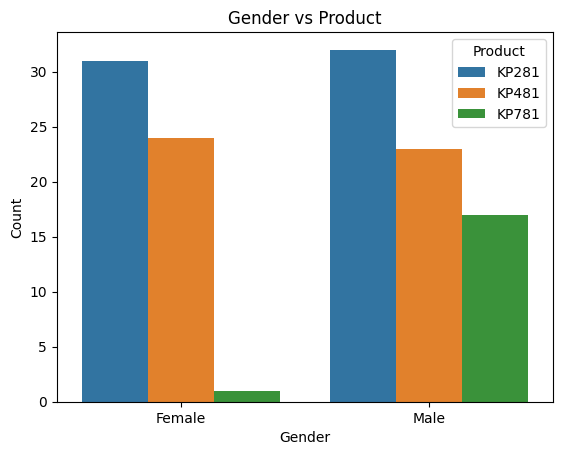

In [ ]:
sns.barplot(x=gender_product.index.get_level_values(0), y=gender_product.values, hue=gender_product.index.get_level_values(1))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Product')
plt.show()

## *Product distribution with respect to Gender*

KP781 (premium) shows higher male preference.

KP481 (mid-level) has the most balanced gender distribution.

KP281 (entry-level) shows slightly higher female preference.

In [ ]:
marital_status_product=new_data.groupby('MaritalStatus')['Product'].value_counts()
marital_status_product

MaritalStatus  Product
Partnered      KP281      39
               KP481      28
               KP781       8
Single         KP281      24
               KP481      19
               KP781      10
Name: count, dtype: int64

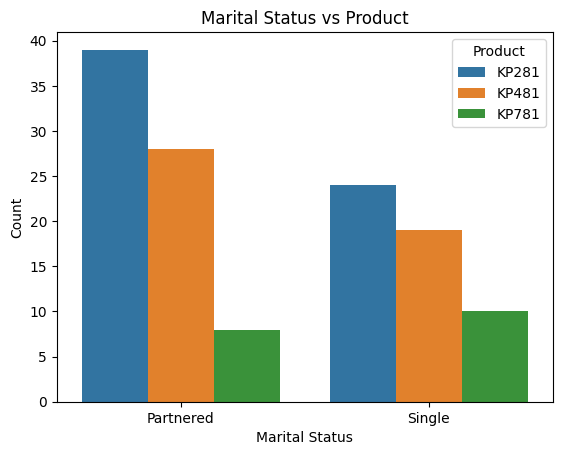

In [ ]:
sns.barplot(x=marital_status_product.index.get_level_values(0), y=marital_status_product.values, hue=marital_status_product.index.get_level_values(1))
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status vs Product')
plt.show()

## *Product distribution with respect to Marital Status:*

KP781(Premium) is more famous among the single customers

KP281 (entry-level) is more famous among the partnered customers

## **There is more tendancy for partners to workout than singles.**

In [ ]:
usage_product=new_data.groupby('Usage')['Product'].value_counts()
usage_product

Usage  Product
2      KP281      14
       KP481       6
3      KP281      29
       KP481      29
       KP781       1
4      KP281      18
       KP481      10
       KP781      10
5      KP781       4
       KP281       2
       KP481       2
6      KP781       2
7      KP781       1
Name: count, dtype: int64

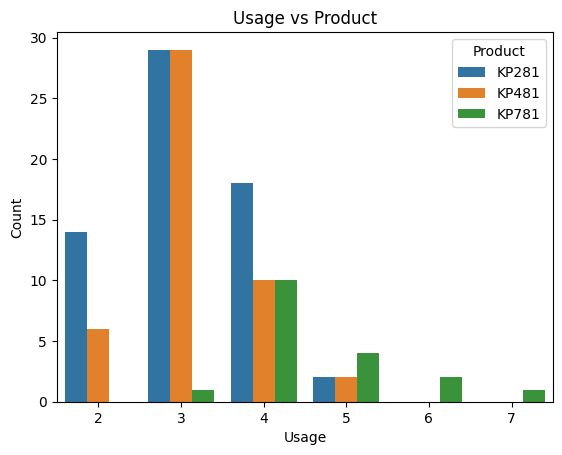

In [ ]:
sns.barplot(x=usage_product.index.get_level_values(0), y=usage_product.values, hue=usage_product.index.get_level_values(1))
plt.xlabel('Usage')
plt.ylabel('Count')
plt.title('Usage vs Product')
plt.show()

## *Product distribution with respect to Usage:*

As the Usage increses Customers preffers KP781, the premium product.

Entry-level users have a more moderate usage pattern.

In [ ]:
fitness_product=new_data.groupby('Fitness')['Product'].value_counts()
fitness_product

Fitness  Product
1        KP281       1
2        KP281       8
         KP481       7
3        KP281      45
         KP481      34
         KP781       3
4        KP281       7
         KP481       6
         KP781       4
5        KP781      11
         KP281       2
Name: count, dtype: int64

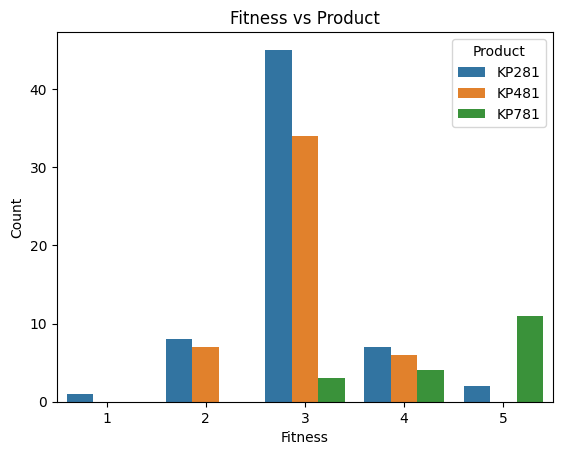

In [ ]:
sns.barplot(x=fitness_product.index.get_level_values(0), y=fitness_product.values, hue=fitness_product.index.get_level_values(1))
plt.xlabel('Fitness')
plt.ylabel('Count')
plt.title('Fitness vs Product')
plt.show()

## *Product distribution with respect to Fitness:*

There is a Strong correlation between fitness level and product choice.


Higher fitness levels strongly prefer premium models.


Lower fitness levels tend toward entry-level models.

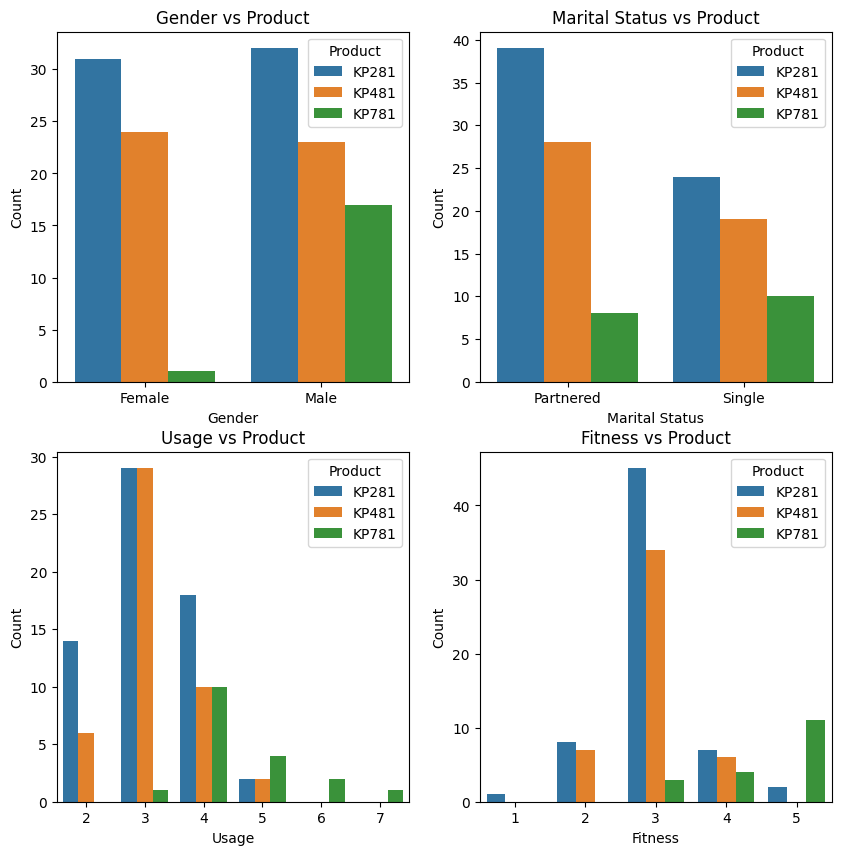

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
sns.barplot(x=gender_product.index.get_level_values(0), y=gender_product.values, hue=gender_product.index.get_level_values(1))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Product')

plt.subplot(2,2,2)
sns.barplot(x=marital_status_product.index.get_level_values(0), y=marital_status_product.values, hue=marital_status_product.index.get_level_values(1))
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status vs Product')

plt.subplot(2,2,3)
sns.barplot(x=usage_product.index.get_level_values(0), y=usage_product.values, hue=usage_product.index.get_level_values(1))
plt.xlabel('Usage')
plt.ylabel('Count')
plt.title('Usage vs Product')

plt.subplot(2,2,4)
sns.barplot(x=fitness_product.index.get_level_values(0), y=fitness_product.values, hue=fitness_product.index.get_level_values(1))
plt.xlabel('Fitness')
plt.ylabel('Count')
plt.title('Fitness vs Product')

plt.show()

# Now Let us look into the Product distribution patterns with respect to the continuous variables in the dataset.

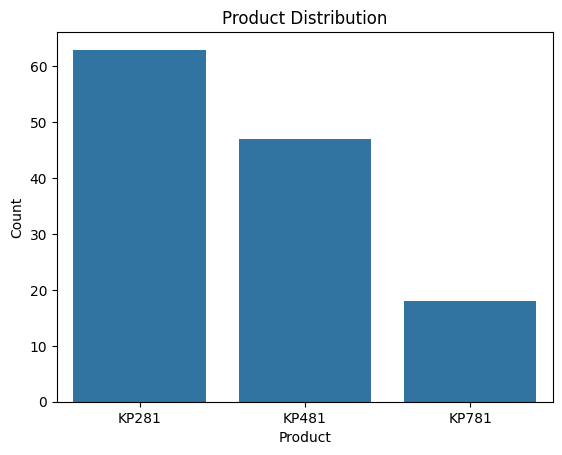

In [ ]:
sns.countplot(data=new_data, x='Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Product Distribution')
plt.show()

## As anticipated, There are a lot of customers for the entry level Product KP281 than the Premium product KP781.

In [ ]:
cont_data=new_data[['Age','Education','Income','Miles','Product']] #A new data base to analyse Continuos columns of the dataset
cont_data

,Age,Education,Income,Miles,Product
6,21,14,35247,75,KP281
8,21,15,35247,141,KP281
9,21,15,37521,85,KP281
10,22,14,36384,85,KP281
11,22,14,35247,66,KP281
...,...,...,...,...,...
159,27,16,83416,160,KP781
160,27,18,88396,100,KP781
163,28,18,77191,180,KP781
164,28,18,88396,150,KP781


In [ ]:
cont_data.describe()

,Age,Education,Income,Miles
count,128.000000,128.000000,128.000000,128.000000
mean,28.265625,15.460938,50682.109375,94.703125
std,5.487975,1.209557,10022.124533,32.257663
min,20.000000,14.000000,35247.000000,47.000000
25%,24.000000,14.000000,45195.750000,75.000000
50%,26.000000,16.000000,50028.000000,85.000000
75%,32.250000,16.000000,54576.000000,106.000000
max,43.000000,18.000000,88396.000000,188.000000


<ipython-input-30-f458ca3836ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_data['age_group']= pd.cut(cont_data['Age'], bins=[15, 20, 25, 30, 35, 40, 45],labels=['16-20', '21-25', '26-30', '31-35', '36-40', '41-45'])


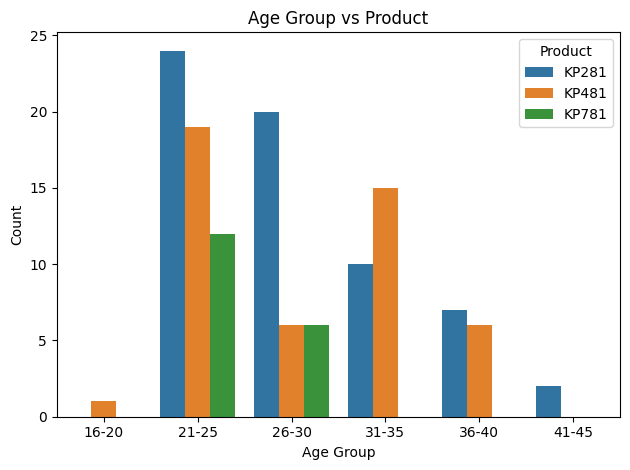

In [ ]:
cont_data['age_group']= pd.cut(cont_data['Age'], bins=[15, 20, 25, 30, 35, 40, 45],labels=['16-20', '21-25', '26-30', '31-35', '36-40', '41-45'])
plot_data=pd.crosstab(cont_data['age_group'],cont_data['Product'])

plot_data=plot_data.reset_index().melt(id_vars='age_group', var_name='Product', value_name='Count')

sns.barplot(data=plot_data, x='age_group', y='Count', hue='Product')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group vs Product')

plt.tight_layout()
plt.show()

## *The following Observations can be made from the above graph:*

KP781 is popular among 26-35 age group.

KP481 shows strong presence in 18-25 age group.

KP281 has more even distribution across age groups.

<ipython-input-31-702c2a6db8ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_data['education_group']= pd.cut(cont_data['Education'], bins=[12,14,16,18],labels=['12-14', '14-16', '16-18'])


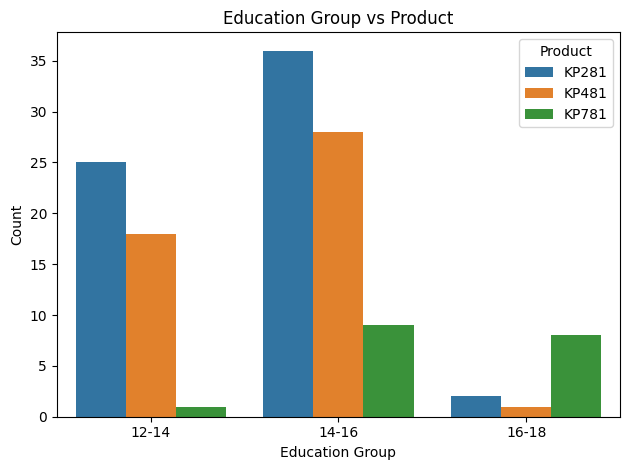

In [ ]:
cont_data['education_group']= pd.cut(cont_data['Education'], bins=[12,14,16,18],labels=['12-14', '14-16', '16-18'])
plot_data=pd.crosstab(cont_data['education_group'],cont_data['Product'])

plot_data=plot_data.reset_index().melt(id_vars='education_group', var_name='Product', value_name='Count')

sns.barplot(data=plot_data, x='education_group', y='Count', hue='Product')
plt.xlabel('Education Group')
plt.ylabel('Count')
plt.title('Education Group vs Product')

plt.tight_layout()
plt.show()

## *The following Observations can be made from the above graph:*

KP281 is popular among the group with 12-16 years of education.

KP481 shows strong presence in group with 14-16 years of education.

KP781 has more Users in the group with 14-18 years of education.

<ipython-input-32-02bda0faae96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_data['income_group']= pd.cut(cont_data['Income'], bins=[30000, 40000, 50000, 60000, 70000, 80000, 90000],labels=['30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000'])


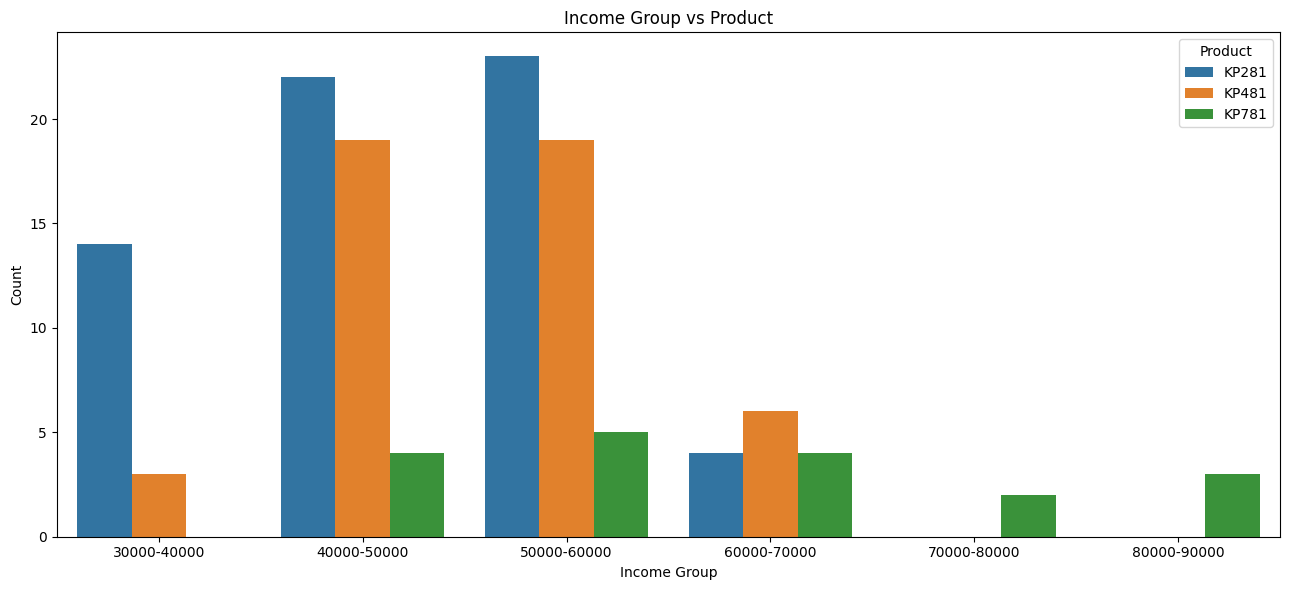

In [ ]:
cont_data['income_group']= pd.cut(cont_data['Income'], bins=[30000, 40000, 50000, 60000, 70000, 80000, 90000],labels=['30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000'])
plot_data=pd.crosstab(cont_data['income_group'],cont_data['Product'])

plot_data=plot_data.reset_index().melt(id_vars='income_group', var_name='Product', value_name='Count')

plt.figure(figsize=(13, 6))
sns.barplot(data=plot_data, x='income_group', y='Count', hue='Product')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Income Group vs Product')

plt.tight_layout()
plt.show()

KP281 and KP481 dominate across all income groups, with KP281 slightly more popular in the 30,000–40,000 range, while KP481 leads in the 40,000–50,000 and 50,000–60,000 ranges.

Income groups between 30,000 and 60,000 are the most active in purchasing products, as seen from the higher counts.

Customers in higher income groups (above 60,000) are less frequent buyers, with a notable drop in product counts.

KP781 is the least popular product across all income groups, with only a small count visible in income ranges 50,000–60,000 and above.

KP281 and KP481 cater mostly to middle-income customers (30,000–60,000), while KP781 sees limited popularity in niche income groups like 60,000–70,000 and above 80,000.

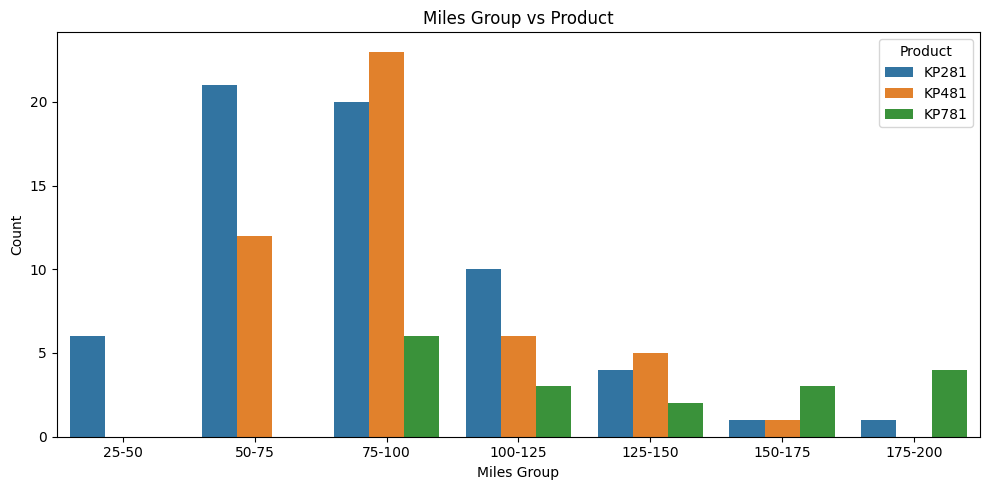

In [ ]:
cont_data['miles_group']= pd.cut(cont_data['Miles'], bins=[25, 50, 75, 100, 125, 150, 175, 200],labels=['25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175-200'])
plot_data=pd.crosstab(cont_data['miles_group'],cont_data['Product'])

plot_data=plot_data.reset_index().melt(id_vars='miles_group', var_name='Product', value_name='Count')

plt.figure(figsize=(10, 5))
sns.barplot(data=plot_data, x='miles_group', y='Count', hue='Product')
plt.xlabel('Miles Group')
plt.ylabel('Count')
plt.title('Miles Group vs Product')

plt.tight_layout()
plt.show()

The 75–100 miles group has the highest number of customers across all products, with KP481 being the most popular in this range.

KP481 outperforms KP281 and KP781 in the 75–100 miles range, making it the preferred product for customers traveling medium distances.

KP281 is strong in the 50–75 miles group but less popular compared to KP481 in the 75–100 miles range.

KP781 is more popular in the longer miles groups (150–200 miles), suggesting that it caters to customers traveling long distances.

Its presence in shorter miles groups (below 100 miles) is minimal, indicating limited appeal for shorter-distance customers.

# ***Conclusion:***

Target Audience for KP481: Medium-distance travelers (75–100 miles) should be the focus, as this is its strongest customer segment.

KP781 Marketing Strategy: Emphasize its utility and appeal to long-distance travelers (150–200 miles).

KP281 Strategy: Maintain a strong presence in the shorter-distance markets (25–75 miles).

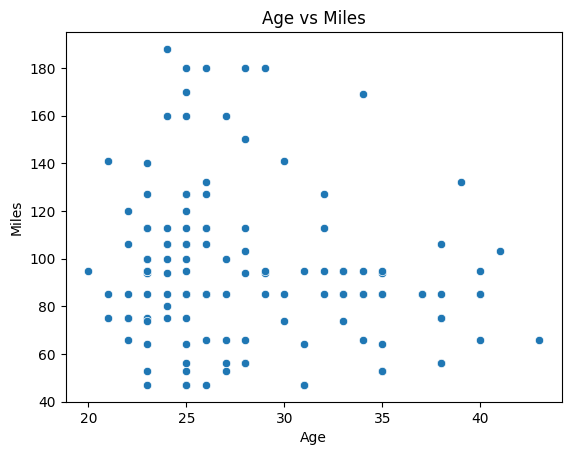

In [ ]:
sns.scatterplot(data=new_data, x='Age', y='Miles')
plt.xlabel('Age')
plt.ylabel('Miles')
plt.title('Age vs Miles')
plt.show()

It can be seen that Younger customers tend to cover longer distances.

As the age increases the number of customers and the number of customers covering long distances decrease.

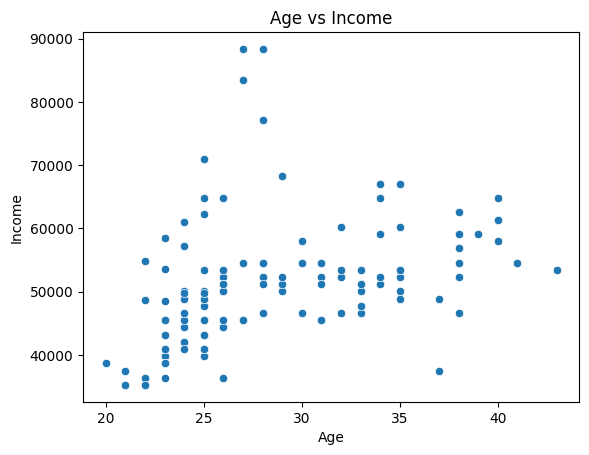

In [ ]:
sns.scatterplot(data=new_data, x='Age', y='Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.show()

it can be observe that most of the customers are in the income range of 40,000 to 55,000.

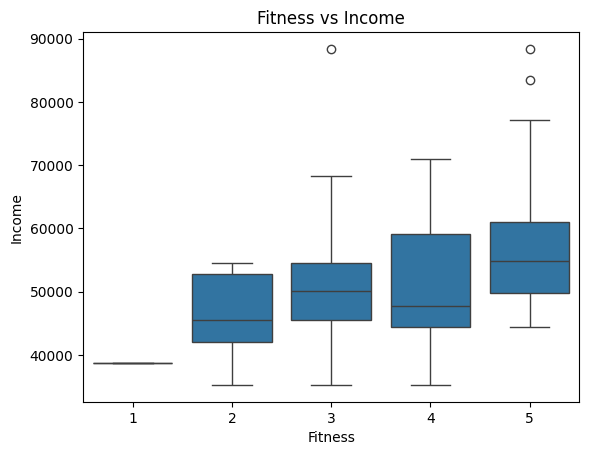

In [ ]:
sns.boxplot(data=new_data, x='Fitness', y='Income')
plt.xlabel('Fitness')
plt.ylabel('Income')
plt.title('Fitness vs Income')
plt.show()

It can be observed that there is a general rise in the fitness level with respect to the income.

# ***Now let us look In to the Marginal and condiotional Probabilities.***

In [ ]:
new_data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
6,KP281,21,Female,14,Partnered,3,3,35247,75
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85
10,KP281,22,Male,14,Single,3,3,36384,85
11,KP281,22,Female,14,Partnered,3,2,35247,66
...,...,...,...,...,...,...,...,...,...
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150


In [ ]:
product_count=new_data.groupby('Product').size()

product_probability=product_count/len(new_data)
product_probability

,0
Product,
KP281,0.492188
KP481,0.367188
KP781,0.140625


The entry-level KP281 is the most popular model overall, followed by the mid-level KP481, with the advanced KP781 having the smallest market share.

In [ ]:
gender_conditional=pd.crosstab(new_data['Gender'],new_data['Product'],margins=True,normalize='index',)
gender_conditional

Product,KP281,KP481,KP781
Gender,,,
Female,0.553571,0.428571,0.017857
Male,0.444444,0.319444,0.236111
All,0.492188,0.367188,0.140625


## **The Above table shows the Conditional Probability Based on Gender**

## *Male customers:*

KP281: 44.44%

KP481: 31.94%

KP781: 23.61%


## *Female customers:*

KP281: 55.35%

KP481: 42.85%

KP781: 1.18%



1.   Female customers strongly prefer the entry-level KP281 and mid-level KP481 models
2.   Male customers have a more even distribution across all three models
3.   There's a notable gender gap in KP781 purchases(23.61% in males compared to onlly 1.18% in Females)









In [ ]:
MaritalStatus_conditional=pd.crosstab(new_data['MaritalStatus'],new_data['Product'],margins=True,normalize='index')
MaritalStatus_conditional

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.520000,0.373333,0.106667
Single,0.452830,0.358491,0.188679
All,0.492188,0.367188,0.140625


# ***The above table  shows the conditional probability based on the marital status***

## *Single customers:*

KP281: 45.28%

KP481: 35.84%

KP781: 18.86%


## *Partnered customers:*

KP281: 52.00%

KP481: 37.33%

KP781: 10.67%



1.   There's surprisingly little difference in purchase patterns between single and partnered customers
2.   Both groups follow the overall trend of preferring the entry-level model



In [ ]:
usage_conditional=pd.crosstab(new_data['Usage'],new_data['Product'],margins=True,normalize='index')
usage_conditional

Product,KP281,KP481,KP781
Usage,,,
2,0.700000,0.300000,0.000000
3,0.491525,0.491525,0.016949
4,0.473684,0.263158,0.263158
5,0.250000,0.250000,0.500000
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.492188,0.367188,0.140625


# ***Inferences from the conditional Prbabilities based on Usage:***

## *Product Usage Trends:*

KP281 is popular for lower usage levels, suggesting it may be better suited for customers with lighter or occasional needs.

KP781 is highly favored for higher usage levels, making it the product of choice for heavy or continuous usage.

## *KP481’s Performance:*

KP481 consistently has a moderate probability across all usage levels but never dominates. It may be a balanced product suited for general-purpose or mid-level usage.

## *Customer Segmentation:*

Customers with low to moderate usage (Usage = 2, 3, 4, and 5) have diverse preferences, with KP281 and KP481 competing more evenly.

Customers with high usage levels (Usage = 6 and 7) strongly favor KP781, suggesting that this product is specifically optimized for high-intensity use cases.

In [ ]:
fitness_conditional=pd.crosstab(new_data['Fitness'],new_data['Product'],margins=True,normalize='index')
fitness_conditional

Product,KP281,KP481,KP781
Fitness,,,
1,1.000000,0.000000,0.000000
2,0.533333,0.466667,0.000000
3,0.548780,0.414634,0.036585
4,0.411765,0.352941,0.235294
5,0.153846,0.000000,0.846154
All,0.492188,0.367188,0.140625


## ***Inferences from the conditional Probabilities based on Fitness Levels:***

## *Product Preferences Based on Fitness Levels:*

KP281 is popular among individuals with lower fitness levels, indicating it may cater to users with basic or introductory needs.

KP781 is strongly preferred by individuals with the highest fitness levels, suggesting it is tailored for advanced users with more demanding requirements.

KP481 appeals to a broader audience but does not dominate in any fitness category, making it a balanced option.

## *Transition in Preferences:*

As fitness levels increase, there is a clear shift in preferences:
KP281 loses dominance at higher fitness levels.

KP781 gains significant preference starting at fitness level 4, eventually dominating at level 5.

## *KP481’s Role:*

KP481 maintains moderate probabilities across all fitness levels, suggesting it is a middle-ground product suitable for general-purpose use.

In [ ]:
cont_data

,Age,Education,Income,Miles,Product,age_group,education_group,income_group,miles_group
6,21,14,35247,75,KP281,21-25,12-14,30000-40000,50-75
8,21,15,35247,141,KP281,21-25,14-16,30000-40000,125-150
9,21,15,37521,85,KP281,21-25,14-16,30000-40000,75-100
10,22,14,36384,85,KP281,21-25,12-14,30000-40000,75-100
11,22,14,35247,66,KP281,21-25,12-14,30000-40000,50-75
...,...,...,...,...,...,...,...,...,...
159,27,16,83416,160,KP781,26-30,14-16,80000-90000,150-175
160,27,18,88396,100,KP781,26-30,16-18,80000-90000,75-100
163,28,18,77191,180,KP781,26-30,16-18,70000-80000,175-200
164,28,18,88396,150,KP781,26-30,16-18,80000-90000,125-150


In [ ]:
age_conditional=pd.crosstab(cont_data['age_group'],cont_data['Product'],margins=True,normalize='index')
age_conditional

Product,KP281,KP481,KP781
age_group,,,
16-20,0.000000,1.000000,0.000000
21-25,0.436364,0.345455,0.218182
26-30,0.625000,0.187500,0.187500
31-35,0.400000,0.600000,0.000000
36-40,0.538462,0.461538,0.000000
41-45,1.000000,0.000000,0.000000
All,0.492188,0.367188,0.140625


## ***Inferences from the conditional probabilities Based on different age groups:***

## *Product Preferences by Age:*

KP281 is the most consistently preferred product across all age groups, dominating in the 21-25, 26-30, 36-40, and 41-45 categories.

KP481 is the exclusive choice for the youngest age group (16-20) and becomes the top preference for the 31-35 group.

KP781 has limited appeal, with only minor preference in the 21-25 and 26-30 groups, and is absent in other age categories.

## *Age-Specific Trends:*

Younger individuals (16-20) exclusively prefer KP481, indicating it is tailored for entry-level or youthful needs.

Middle-aged groups (36-40 and 41-45) show a strong bias toward KP281, suggesting it appeals to a more experienced demographic.

KP781 is more relevant for younger adults (21-30) but fails to capture interest in other groups.

## *Transition in Preferences:*

As age increases, the preference for KP281 grows significantly, peaking at 100% in the 41-45 category.

KP481 sees a gradual decline in preference as age increases, with its highest relevance in younger age groups.


In [ ]:
education_conditional=pd.crosstab(cont_data['education_group'],cont_data['Product'],margins=True,normalize='index')
education_conditional

Product,KP281,KP481,KP781
education_group,,,
12-14,0.568182,0.409091,0.022727
14-16,0.493151,0.383562,0.123288
16-18,0.181818,0.090909,0.727273
All,0.492188,0.367188,0.140625


## ***Inferences from conditional Probability based on Educational levels:***

## *Product Preferences by Education Level:*

KP281 is the leading choice for individuals with education levels of 12-14 and 14-16.

KP481 maintains a strong secondary position in the 12-14 and 14-16 groups but loses relevance in the 16-18 group.

KP781 dominates in the 16-18 group, suggesting it caters well to individuals with higher education levels.

## *Education-Specific Trends:*

As education levels increase, preference shifts from KP281 and KP481 to KP781.
KP281 starts strong but loses ground to KP781 in the 16-18 group.

KP481 consistently appeals to the 12-14 and 14-16 groups but sees minimal interest from the 16-18 group.

## *Preference Shifts:*

The preference for KP781 dramatically increases in the 16-18 group, indicating that it likely aligns with the specific needs or preferences of individuals at this education level.

KP281 and KP481 are more relevant to those with lower educational levels.

In [ ]:
Income_conditional=pd.crosstab(cont_data['income_group'],cont_data['Product'],margins=True,normalize='index')
Income_conditional

Product,KP281,KP481,KP781
income_group,,,
30000-40000,0.823529,0.176471,0.000000
40000-50000,0.488889,0.422222,0.088889
50000-60000,0.489362,0.404255,0.106383
60000-70000,0.285714,0.428571,0.285714
70000-80000,0.000000,0.000000,1.000000
80000-90000,0.000000,0.000000,1.000000
All,0.492188,0.367188,0.140625


## ***Inferences from the conditional probabilities based on Income slabs:***

## *Income-Specific Trends:*

KP281 is the most popular product for income groups below 60,000 but loses favor as income increases.

KP481 appeals more to mid-income groups (40,000-70,000), peaking in the 60,000-70,000 range.

KP781 has no relevance in income groups below 60,000 but becomes the exclusive choice for higher-income groups (70,000+).

## *Preference Shifts:*

There is a clear transition in product preferences as income increases:
KP281 → KP481 → KP781.

KP781's dominance in higher-income groups suggests it is perceived as a premium product.

## *Economic Factors:*

KP281 likely caters to cost-conscious consumers, making it ideal for lower-income groups.

KP781's appeal to higher-income groups indicates its value proposition aligns with premium or luxury preferences.

In [ ]:
miles_conditional=pd.crosstab(cont_data['miles_group'],cont_data['Product'],margins=True,normalize='index')
miles_conditional

Product,KP281,KP481,KP781
miles_group,,,
25-50,1.000000,0.000000,0.000000
50-75,0.636364,0.363636,0.000000
75-100,0.408163,0.469388,0.122449
100-125,0.526316,0.315789,0.157895
125-150,0.363636,0.454545,0.181818
150-175,0.200000,0.200000,0.600000
175-200,0.200000,0.000000,0.800000
All,0.492188,0.367188,0.140625


# ***Inference from conditional probability based on Miles covered by a customer:***


**Product KP281**: Dominates lower mileage groups, peaking at 100% in the 25-50 miles range but declines in higher mileage groups, reaching only 20% in 175-200 miles.

**Product KP481**: Gains traction in mid-mileage ranges, peaking at 45.45% in 125-150 miles, but declines slightly in higher mileage.

**Product KP781**: Negligible in lower mileage but dominates higher mileage groups, becoming the top choice in 150-175 and 175-200 miles.

**Overall Usage**: KP281 leads overall (49.22%), followed by KP481 (36.72%), while KP781, despite high-mileage dominance, trails at 14.06%.

***Insight***: Product preferences shift with mileage, presenting opportunities for targeted marketing to different mileage segments.

In [ ]:
corr_df=new_data.select_dtypes(include=['number'])
corr_df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.178319,-0.160675,-0.122502,0.410074,-0.162076
Education,0.178319,1.000000,0.412842,0.330841,0.503286,0.252161
Usage,-0.160675,0.412842,1.000000,0.527529,0.326052,0.722373
Fitness,-0.122502,0.330841,0.527529,1.000000,0.303467,0.725811
Income,0.410074,0.503286,0.326052,0.303467,1.000000,0.290928
Miles,-0.162076,0.252161,0.722373,0.725811,0.290928,1.000000


<Axes: >

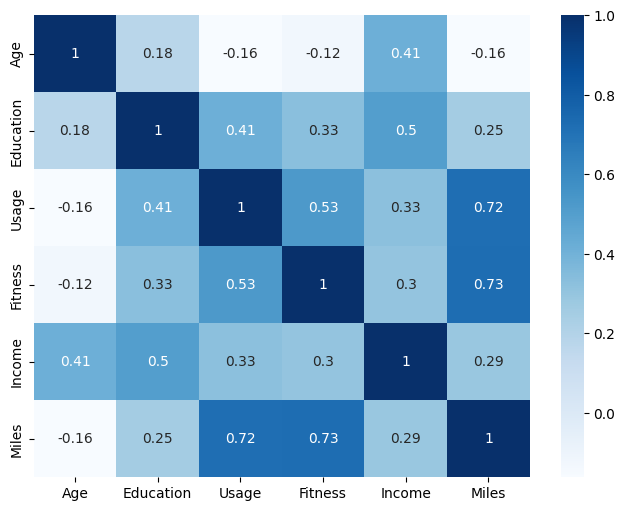

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), cmap='Blues', annot=True)

## **Positive correlations:**

Age with Income (0.41)

Education with Income (0.50)

Usage with Fitness (0.53)

Usage with Miles (0.72)

Fitness with Miles (0.73)

Education with Miles (0.25)

Income with Miles (0.29)

## **Negative correlations:**

Age with Usage (-0.16)

Age with Fitness (-0.12)

## ***Potential Implications:***

Age and Income: Older individuals tend to have higher incomes, which could be due to factors like experience, seniority, or longer time in the workforce.

Education and Income: Higher education levels are associated with higher income, highlighting the importance of education in economic outcomes.

Usage, Fitness, and Miles: Higher usage is strongly associated with higher fitness levels and miles, suggesting that usage could be a driver of both fitness and miles.

Age and Usage/Fitness: Older individuals tend to have lower usage and fitness levels, which could be relevant for designing age-targeted programs or services.

## ***Caveats:***

Correlation does not imply causation: While the correlations suggest relationships between variables, they do not establish a cause-and-effect relationship.

Strength of correlations: Some correlations are weak (e.g., Age with Usage) and may not be practically significant.

# **Product: KP281 (Entry-Level)**

## *Demographic Profile:*

Age: Primarily 21-35 years old, with a strong presence in the 26-30 and 31-35 age groups.

Gender: Slightly higher female preference (55.35% female vs. 44.44% male).

Marital Status: More popular among partnered customers (52.00% partnered vs. 45.28% single).

Education: Strong preference among customers with 12-16 years of education.

Income: Predominantly in the 30,000–60,000 income range, with a slight preference in the 30,000–40,000 bracket.

Fitness Level: Lower to moderate fitness levels, with a general rise in fitness level as income increases.

Usage: Lower to moderate usage levels (Usage = 2, 3, 4, and 5).

Miles Covered: Strong preference among customers covering 25-75 miles, with a peak in the 50-75 miles range.

## *Behavioral Profile:*

Preferred Product Features: Likely prefers basic features, cost-effective solutions, and ease of use.

Lifestyle: Tends to be more cost-conscious, possibly with a focus on entry-level fitness or usage needs.

Purchase Motivation: Likely driven by budget constraints, entry-level needs, and possibly a desire to start using the product without a high initial investment.

## *Marketing Strategy:*

Target Audience: Focus on younger to middle-aged females, partnered customers, and those with lower to mid-range incomes.

Messaging: Emphasize affordability, ease of use, and basic functionality.

Channels: Target online platforms, social media, and community centers where younger audiences are more engaged.

# **Product: KP481 (Mid-Level)**

# *Demographic Profile:*

Age: Strong presence in the 18-25 and 31-35 age groups, with a balanced distribution across age groups.

Gender: Relatively balanced gender distribution (31.94% male, 42.85% female).

Marital Status: Similar purchase patterns among single and partnered customers (35.84% single, 37.33% partnered).

Education: Strong preference among customers with 14-16 years of education.

Income: Most popular in the 40,000–50,000 and 50,000–60,000 income ranges.

Fitness Level: Moderate fitness levels, with a broad appeal across different fitness categories.

Usage: Moderate usage levels (Usage = 3, 4, and 5).

Miles Covered: Strong preference among customers covering 75-100 miles.

## *Behavioral Profile:*

Preferred Product Features: Likely prefers a balance between features and price, suitable for general-purpose use.

Lifestyle: Possibly more balanced in terms of lifestyle, with a mix of work, fitness, and personal life commitments.

Purchase Motivation: Driven by a need for a versatile product that can handle various usage scenarios without being too expensive.

## *Marketing Strategy:*

Target Audience: Focus on younger to middle-aged customers with mid-range incomes, particularly those in the 18-25 and 31-35 age groups.

Messaging: Emphasize versatility, balance, and moderate pricing.

Channels: Target mid-range retail outlets, fitness centers, and online platforms that cater to a broad audience.

# **Product: KP781 (Premium)**

## *Demographic Profile:*

Age: Primarily 26-35 years old, with a strong presence in the 26-30 and 31-35 age groups.

Gender: Strong male preference (23.61% male vs. 1.18% female).

Marital Status: More popular among single customers (18.86% single vs. 10.67% partnered).

Education: Strong preference among customers with 14-18 years of education.

Income: Predominantly in the higher income brackets (above 60,000), with a strong presence in the 70,000+ range.

Fitness Level: Higher fitness levels, with a strong preference from customers with fitness level 4 and above.

Usage: Higher usage levels (Usage = 6 and 7).

Miles Covered: Strong preference among customers covering 150-200 miles.

## *Behavioral Profile:*

Preferred Product Features: Likely prefers advanced features, durability, and high performance.

Lifestyle: Tends to be more affluent, with a focus on high-intensity fitness or usage needs.

Purchase Motivation: Driven by a need for high-quality, high-performance products, possibly willing to invest in a premium product for superior functionality.

## *Marketing Strategy:*

Target Audience: Focus on younger to middle-aged males, single customers, and those with higher incomes and education levels.

Messaging: Emphasize premium quality, advanced features, and high performance.

Channels: Target high-end retail outlets, luxury fitness centers, and online platforms that cater to premium customers.

# ***Summary of Customer Profiles:***

KP281 (Entry-Level): Younger to middle-aged females, partnered, lower to mid-range income, lower to moderate fitness, short to medium miles.

KP481 (Mid-Level): Balanced gender, younger to middle-aged, mid-range income, moderate fitness, medium miles.

KP781 (Premium): Younger to middle-aged males, single, higher income, high fitness, long miles.

### Detailed Recommendations Based on Analysis

**1. Product Positioning and Marketing Strategy:**

- **KP281 (Entry-Level):**
  - **Target Audience:** Younger females, partnered customers, and those in the middle-income bracket.
  - **Marketing Message:** Emphasize affordability, ease of use, and suitability for casual or entry -level users.
  - **Features to Highlight:** Basic functionalities that meet the needs of new users or those with lower usage intensity.

- **KP481 (Mid-Level):**
  - **Target Audience:** A broad age range, including 18-25 and 31-35 age groups, with mid-range incomes.
  - **Marketing Message:** Position as a versatile, balanced product suitable for a wide range of users.
  - **Features to Highlight:** Moderate performance features that cater to general-purpose use.

- **KP781 (Premium):**
  - **Target Audience:** High-income males, singles, and those with higher education levels.
  - **Marketing Message:** Focus on premium quality, advanced features, and superior performance for serious users.
  - **Features to Highlight:** Durability, comfort for extended use, and advanced technological features.

**2. Product Development and Feature Enhancement:**

- **KP281:**
  - Consider adding features that appeal to older customers, such as enhanced durability or ease of use.
  - Ensure pricing remains competitive for the middle-income segment.

- **KP481:**
  - Explore adding features that attract higher mid-range income customers without compromising on versatility.
  - Maintain a balance in features to keep it appealing to a broad customer base.

- **KP781:**
  - Enhance features that support long-distance use, such as improved comfort and durability.
  - Consider introducing it to the upper end of the middle-income group if it offers significant value.

**3. Addressing Market Gaps and Opportunities:**

- **High-Income Females:**
  - Investigate why there is a gender gap in KP781 purchases. Consider marketing campaigns that appeal to high-income females, highlighting features that meet their specific needs.

- **Fitness Level Segmentation:**
  - Develop marketing campaigns tailored to different fitness levels, emphasizing how each product meets the specific needs of various fitness segments.

**4. Leveraging Correlations and Demographic Insights:**

- **Age and Income:**
  - Tailor product features and marketing messages to accommodate the preferences of older, higher-income customers for KP781.

- **Education and Income:**
  - Target higher education levels with KP781, highlighting its advanced features and technological sophistication.

**5. Usage Patterns and Miles Covered:**

- **KP281:**
  - Market it as the ideal product for shorter distances and casual use.

- **KP481:**
  - Position it for medium-distance users, emphasizing its balance and versatility.

- **KP781:**
  - Highlight its suitability for long-distance, high-intensity use.

**6. Income Distribution Focus:**

- **KP281 and KP481:**
  - Ensure these products remain attractive to the majority income group (40,000 to 55,000) by offering competitive pricing and relevant features.

- **KP781:**
  - Continue to target higher-income segments, ensuring the product's premium positioning is clear and compelling.

**7. Customer Preferences and Demographic Considerations:**

- **Gender Preferences:**
  - Conduct further research to understand the gender disparity in KP781 purchases and adjust marketing strategies accordingly.

- **Age and Fitness Level:**
  - Develop products and marketing campaigns that cater to the varying fitness levels and usage patterns across different age groups.

By implementing these recommendations, the company can better align its products with customer needs, optimize marketing efforts, and potentially expand its market reach in underserved segments.